In [98]:
import  numpy  as np
import pandas as pd
import math
from  sklearn import datasets
from  sklearn import linear_model
from  sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt



# ap =   data_columns.columns.get_loc("creator") #GETTING INDEX OF A COLUMN 
# check = df.iloc[ : , [ap , ap+1 ]] #GETTING ACCESS TO ROW , COLUMNS IN THE DATA FRAME*
# check.to_csv('check.csv') #SAVING IT IN CSV FILE TO CHECK RELEVANCE
# new_df = df.drop(useless_values,axis=1) #TO DROP ALL VALUES FROM A SPECIFIC  COLUMN
#df[i].isna().sum() #TO CALCULATE THE NaN or None values in a column


In [99]:
pd.set_option('display.max_columns' , None)
#pd.set_option('display.max_rows' , None)

original_df =  pd.read_csv('OCRDF.csv' , delimiter='\t') 
original_df.shape

D:\Users\retbu\AppData\Local\Temp\ipykernel_18896\1588099760.py:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df =  pd.read_csv('OCRDF.csv' , delimiter='\t')


(320772, 162)

In [100]:
df_clean_col = original_df
data_columns = df_clean_col.head(0) #GETTING NAME OF EACH COLUMNS
useless_values = []

for i in data_columns:
  if df_clean_col[i].isna().sum() > 200000:
    df_clean_col.drop(i , axis=1 , inplace=True)
  

manual_useless_values = ['code' ,'url' ,'product_name' , 'brands' ,'creator' , 'created_t' , 'created_datetime' , 'last_modified_t','last_modified_datetime','brands_tags','countries','countries_tags','countries_fr','states','states_tags','states_fr' , 'additives_tags' , 'additives_fr' , 'serving_size' , 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr'  , 'ingredients_from_palm_oil_n' ,  'additives_n' , 'additives' , 'ingredients_text' ,  'nutrition-score-uk_100g' ,'vitamin-a_100g'  , 'vitamin-c_100g' , 'calcium_100g' , 'iron_100g']

df_clean_col.drop(manual_useless_values, axis=1 , inplace=True)



,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
1,2243.0,28.57,28.57,0.0,0.018,64.290,14.29,3.6,3.57,0.000000,14.0
2,1941.0,17.86,0.00,0.0,0.000,60.710,17.86,7.1,17.86,0.250000,0.0
3,2540.0,57.14,5.36,NaN,NaN,17.860,3.57,7.1,17.86,0.482000,12.0
4,1552.0,1.43,NaN,NaN,NaN,77.140,NaN,5.7,8.57,NaN,NaN
5,1933.0,18.27,1.92,NaN,NaN,63.460,11.54,7.7,13.46,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320756,569.0,31.00,NaN,NaN,NaN,12.200,9.60,1.1,2.10,0.433071,NaN
320757,2406.0,NaN,3.73,NaN,NaN,5.835,3.89,12.2,21.22,0.039370,0.0
320763,21.0,0.20,0.20,NaN,NaN,0.500,0.50,0.2,0.50,0.010000,2.0
320768,0.0,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.00,0.000000,0.0


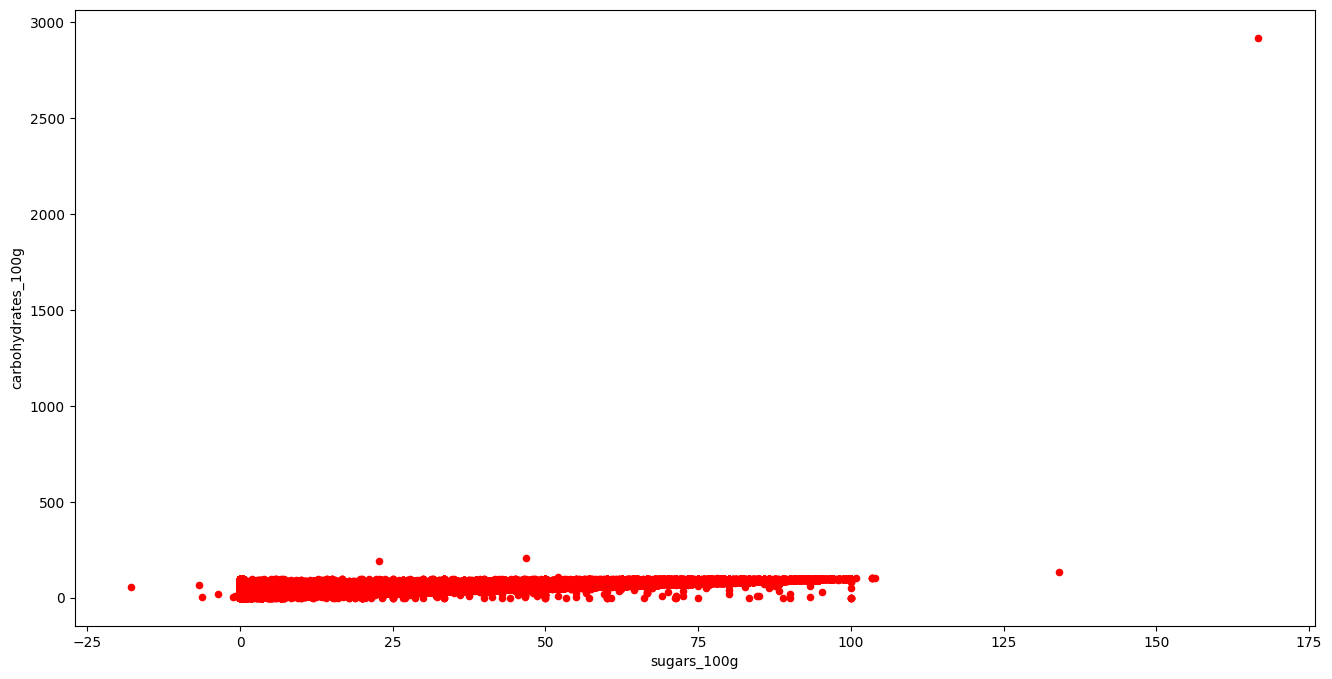

In [104]:
neg = (df_clean_col['energy_100g'] < 0 ) |  (df_clean_col['energy_100g']>3700 ) | (df_clean_col['fat_100g'] < 0 ) | (df_clean_col['saturated-fat_100g'] < 0 ) | (df_clean_col['trans-fat_100g'] < 0 ) | (df_clean_col['cholesterol_100g'] < 0 ) | (df_clean_col['carbohydrates_100g'] < 0 ) | (df_clean_col['sugars_100g'] < 0 ) | (df_clean_col['fiber_100g'] < 0 ) | (df_clean_col['proteins_100g'] < 0 ) |  (df_clean_col['sodium_100g'] < 0 ) | df_clean_col['salt_100g'] < 0 | (df_clean_col['fat_100g'] >100 ) | (df_clean_col['saturated-fat_100g'] >100 ) | (df_clean_col['trans-fat_100g'] >100 ) | (df_clean_col['cholesterol_100g'] >100 ) | (df_clean_col['carbohydrates_100g'] >100 ) | (df_clean_col['sugars_100g'] >100 ) | (df_clean_col['fiber_100g'] >100 ) | (df_clean_col['proteins_100g'] >100 ) |  (df_clean_col['sodium_100g'] >100 ) | (df_clean_col['salt_100g'] >100 )

#stats_columns = []

#for i  in range(5,19):
  #stats_columns.append(df_clean_col.columns[i])
#stats_columns

#for i in stats_columns:
    
   # pd.concat([df_neg_row , df_clean_col[(df_clean_col[i] < 0 )] ]  , axis = 0 , ignore_index=True )

df_neg_row = df_clean_col[neg]  #THERE IS 18 ROWS TO DELETE

df_clean_rows = df_clean_col.drop(df_neg_row.index)

#pd.DataFrame(df_clean_rows['nutrition-score-fr_100g'].value_counts().sort_index()).plot(kind='bar' , figsize= (16,8))

df_clean_rows.dropna(thresh=1 , inplace=True)

# df_clean_rows = df_clean_rows.reset_index(drop=True)  #RESET INDEXES


reg_glucide = df_clean_rows[(df_clean_rows['carbohydrates_100g'].isna() ==True)  & (df_clean_rows['sugars_100g'].isna() == False)]

#print('before' , df_clean_rows['salt_100g'].isna().sum())

df_clean_rows.plot(kind='scatter' , x='sugars_100g' , y='carbohydrates_100g'  ,  color = 'red'  , figsize= (16,8))


#WE CAN SEE THAT THE MOST COMMON RATIO IS 1 carbohydrates = 1.5  sugars,we apply that ratio  when filling  the columns

df_clean_rows['carbohydrates_100g'] = np.where(df_clean_rows['carbohydrates_100g'].isna() == True ,
                                               1.5*df_clean_rows['sugars_100g'] ,  
                                               df_clean_rows['carbohydrates_100g'] )


#df_clean_rows['salt_100g'] = np.where(df_clean_rows['salt_100g'].isna() == True , df_clean_rows['sodium_100g'] ,  df_clean_rows['salt_100g'] )

reg_salt = df_clean_rows[(df_clean_rows['salt_100g'].isna() ==True) 
                         & (df_clean_rows['sodium_100g'].isna() == False)] #THERE IS NONE MISSING VALUES  FOR SALT,SO WE CAN DROP ONE AND IT'D BE SALT

df_clean_rows.drop('salt_100g', axis=1 , inplace=True)

reg_fat = df_clean_rows[(df_clean_rows['fat_100g'].isna() ==True) 
                         & (df_clean_rows['saturated-fat_100g'].isna() == False)
                         & (df_clean_rows['trans-fat_100g'].isna() == False)
                         & (df_clean_rows['cholesterol_100g'].isna() == False)]

df_clean_rows


    #new_df.drop(labels = i , axis=0)
#for i in range(len(new_df)+1):
  #np.where(new_df.iloc[1 , 11 :].isna().sum() == 17 , i , new_df)


#NUMPY.WHERE 262756
#Finir toutes les nans - USEFUL DATA SET